# Tipos de datos

## Primitivos

In [5]:
from datetime import datetime

integer_type = 42
float_type = 3.14159
bool_type = False
hex_type = 0xff
oct_type = 0o23
today = datetime.now()
str_type = 'Juan'

## Estructurados

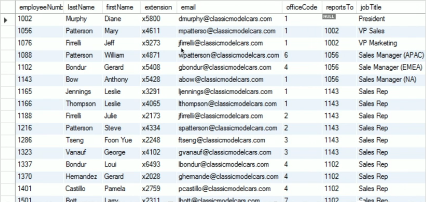

In [3]:
from IPython.display import Image

Image('mysql_table_example.png')

## Semi estructurados

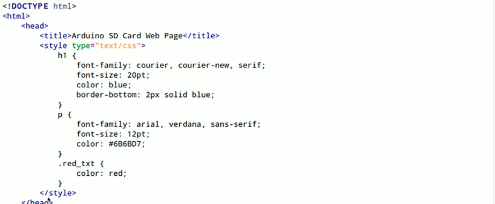

In [4]:
Image('html_markdown_example.png')

## No estructurados

Beautiful is better than ugly.

Explicit is better than implicit.

Simple is better than complex.

Complex is better than complicated.

Flat is better than nested.

Sparse is better than dense.

Readability counts.

Special cases aren't special enough to break the rules.

Although practicality beats purity.

Errors should never pass silently.

Unless explicitly silenced.

In the face of ambiguity, refuse the temptation to guess.

There should be one-- and preferably only one --obvious way to do it.

Although that way may not be obvious at first unless you're Dutch.

Now is better than never.

Although never is often better than *right* now.

If the implementation is hard to explain, it's a bad idea.

If the implementation is easy to explain, it may be a good idea.

Namespaces are one honking great idea -- let's do more of those!

# Solicitudes a la web

In [6]:
import requests

response = requests.get('https://www.platzi.com')

response

response??

print(dir(response))

['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']


In [14]:
print(response.status_code)
print(response.headers)
print(response.headers['Date'])
print(response.text)

200
{'Date': 'Wed, 06 Nov 2019 01:53:09 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Headers': 'X-Requested-With,content-type,X-CSRFToken', 'Access-Control-Allow-Methods': 'GET, POST', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=86400; includeSubDomains', 'Vary': 'Accept-Encoding', 'X-Content-Type-Options': 'nosniff', 'X-DNS-Prefetch-Control': 'off', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'SAMEORIGIN', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-XSS-Protection': '1; mode=block', 'CF-Cache-Status': 'DYNAMIC', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '53136e9dbd65b558-BOG', 'Content-Encoding': 'gzip'}
Wed, 06 Nov 2019 01:53:09 GMT

    <!doctype html>
      <html lang="es">
        <head>
          
          <meta nam

# Extracción de información del HTML

In [21]:
import bs4

soup = bs4.BeautifulSoup(response.text, 'html.parser')

print(soup.title.text)
print(soup.select('meta[name=description]'))
print(soup.select('meta[name=description]')[0])
print(soup.select('meta[name=description]')[0]['content'])

Cursos Online Profesionales de Tecnología | ‎🚀 Platzi
[<meta content="Aprende desde cero a crear el futuro web con nuestros Cursos Online Profesionales de Tecnología. ¡Cursos Únicos de Desarrollo, Diseño, Marketing y Negocios!" name="description"/>]
<meta content="Aprende desde cero a crear el futuro web con nuestros Cursos Online Profesionales de Tecnología. ¡Cursos Únicos de Desarrollo, Diseño, Marketing y Negocios!" name="description"/>
Aprende desde cero a crear el futuro web con nuestros Cursos Online Profesionales de Tecnología. ¡Cursos Únicos de Desarrollo, Diseño, Marketing y Negocios!


In [31]:
response = requests.get('https://mintic.platzi.com/')

soup = bs4.BeautifulSoup(response.text, 'html.parser')

courses_links = soup.select('.SingleCourse-head-anchor')

# for course in courses_links:
#    print(course['href'])
# Another way to implement the previous code

courses = [course['href'] for course in courses_links]

for course in courses:
    print(course)

/cursos/beca-mintic/
/cursos/mintic-aprender/
/cursos/mintic-python/
/cursos/mintic-ingenieria-datos/
/cursos/mintic-machine-learning/
/cursos/mintic-scikit/
/cursos/mintic-analisis-predictivo/
/cursos/mintic-ia/
/cursos/mintic-dialogflow/
/cursos/mintic-ibm-watson/
/cursos/mintic-db-aws/
/cursos/mintic-big-data/


# Web Scrapper ElTiempo

In [66]:
response = requests.get("https://www.eltiempo.com/")

soup = bs4.BeautifulSoup(response.text, 'html.parser')
#print(soup)

news_headers = soup.select('.image-container')
#print(news_headers)
#print(news_headers[0])
#print(news_headers[0]('a'))
#print(news_headers[0]('a')[0])
#print(news_headers[0]('a')[0]['href'])

news_links = [news_header('a')[0]['href'] for news_header in news_headers]

for news_link in news_links:
    print(news_link)

/politica/congreso/ministro-de-defensa-guillermo-botero-en-vivo-siga-el-debate-de-mocion-de-censura-430736
/deportes/futbol-colombiano/asi-quedaron-los-grupos-de-los-cuadrangulares-semifinales-de-la-liga-aguila-430852
/justicia/servicios/general-norberto-mujica-es-el-nuevo-director-del-inpec-430860
/justicia/investigacion/se-entrega-felix-garcia-chabur-acusado-de-videos-sexuales-en-ibague-430698
/deportes/futbol-internacional/copa-libertadores-2019-final-river-plate-vs-flamengo-se-jugara-en-lima-430650
/deportes/futbol-internacional/james-rodriguez-sigue-lesionado-y-no-jugara-el-real-madrid-vs-galatasaray-430512
/deportes/futbol-internacional/asi-quedo-el-sorteo-del-campeonato-preolimpico-de-colombia-2020-430812
/cultura/musica-y-libros/musica-y-libros-430486
/contenido-comercial/comprar-vivienda-desde-el-exterior-si-es-posible-424476
/cultura/gente/walter-mercado-quienes-recibiran-su-herencia-y-cuanto-dinero-es-430678
/cultura/gente/walter-mercado-las-frases-mas-llamativas-de-su-carre